In [11]:
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import cv2
import numpy as np
import imutils
import random
import pickle
import os
import shutil
import time

In [12]:
ROOT_DIR = Path.cwd().parent

ensemble_A = Path(ROOT_DIR, 'EnsembleA_H2020')

In [13]:
def walk_shapes(shape_dir):
    import os

    paths = [Path(ensemble_A, shape_dir, f'{shape_dir[:-1]}{i}') for i in [2,3,4,5]]

    sub_shapes = dict()
    for p in paths:
        img = []
        for root, dirs, files in os.walk(str(p)):
            [img.append(f'{p}/{f}') for f in files]
        sub_shapes.update({p.name: img})

    return sub_shapes

In [4]:
def detect_shape(contour):
    # initialize the shape name and approximate the contour
    shape = "unidentified"
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

    # if the shape is a triangle, it will have 3 vertices
    if len(approx) == 3:
        shape = "triangle"

    # if the shape has 4 vertices, it is either a square or
    # a rectangle
    elif len(approx) == 4:
        # compute the bounding box of the contour and use the
        # bounding box to compute the aspect ratio
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)

        # a square will have an aspect ratio that is approximately
        # equal to one, otherwise, the shape is a rectangle
        shape = "square" if ar >= 0.95 and ar <= 1.05 else "diamond"

    # if the shape is a pentagon, it will have 5 vertices
    elif len(approx) == 5:
        shape = "hexagon"

    # otherwise, we assume the shape is a circle
    else:
        shape = "circle"

    # return the name of the shape
    return shape

Cercle2
WOW
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleB_H2020/Cercles/Cercle2/244_Cercle2.jpg
WOW
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleB_H2020/Cercles/Cercle2/293_Cercle2.jpg
WOW
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleB_H2020/Cercles/Cercle2/83_Cercle2.jpg
WOW
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleB_H2020/Cercles/Cercle2/203_Cercle2.jpg
WOW
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleB_H2020/Cercles/Cercle2/9_Cercle2.jpg
WOW
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleB_H2020/Cercles/Cercle2/306_Cercle2.jpg
WOW
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleB_H2020/Cercles/Cercle2/281_Cercle2.jpg
WOW
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleB_H2020/Cercles/Cercle2/122_Cercle2.jpg
WOW
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleB_H2020/Cercles/Cercle2/8_Cercle2.jpg
WOW
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleB_H2020/Cercles/Cercle2/160_Cercle2.jpg
WOW
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/

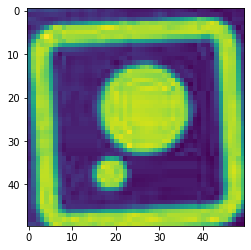

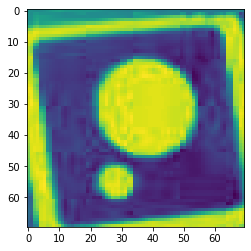

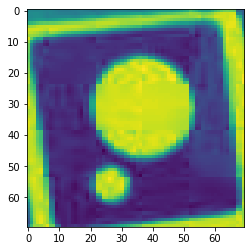

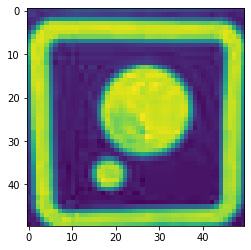

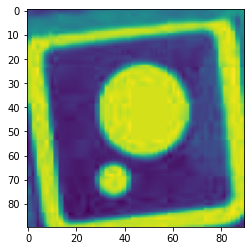

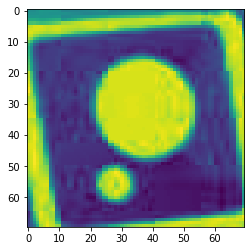

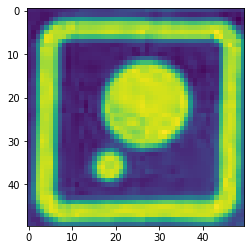

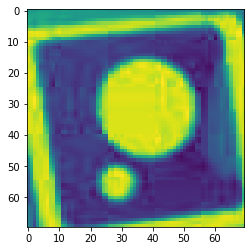

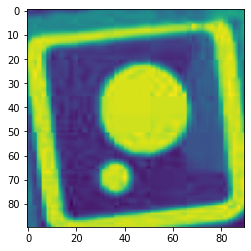

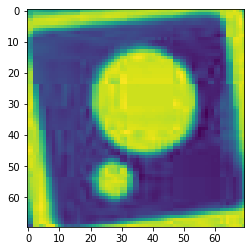

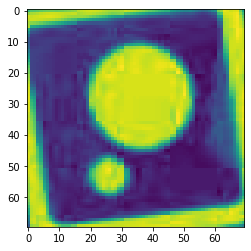

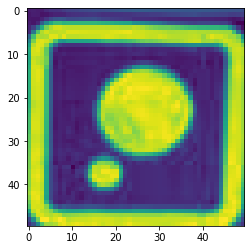

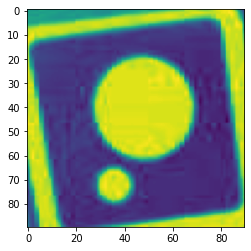

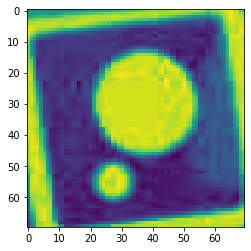

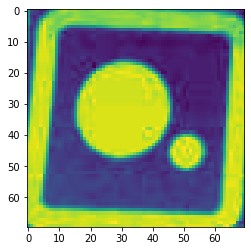

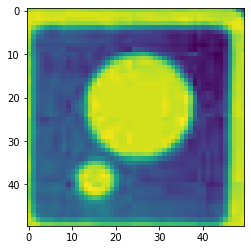

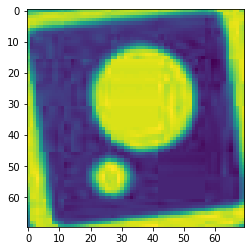

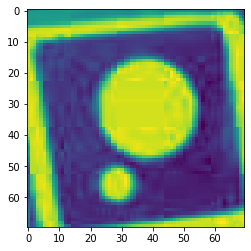

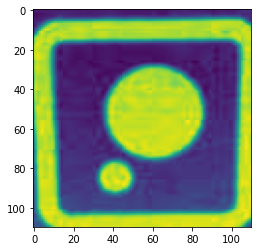

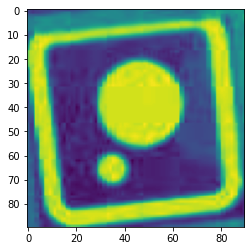

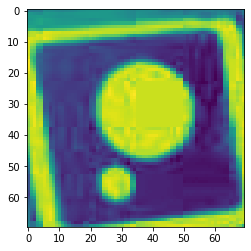

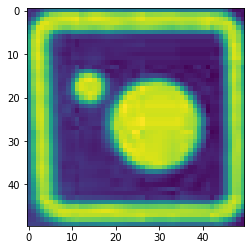

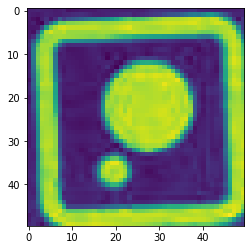

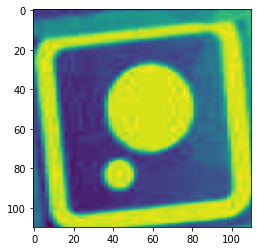

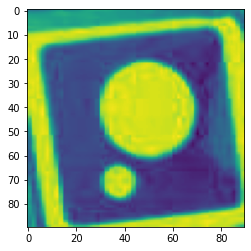

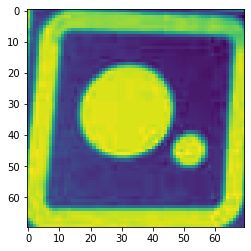

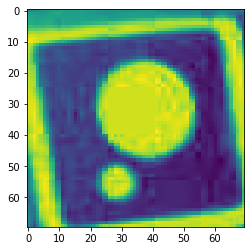

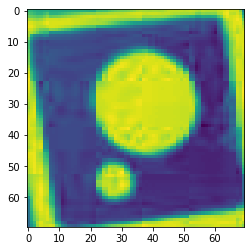

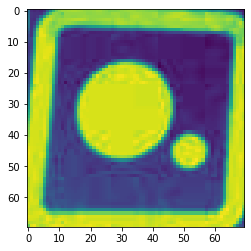

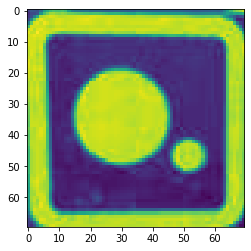

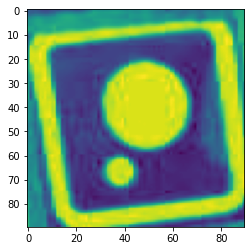

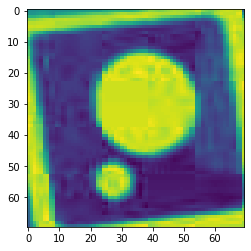

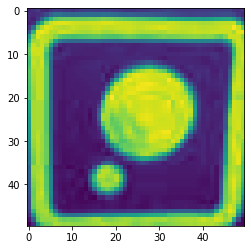

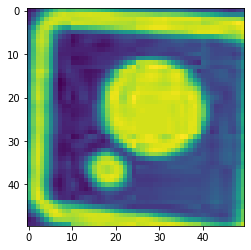

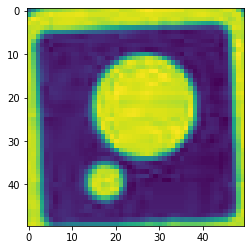

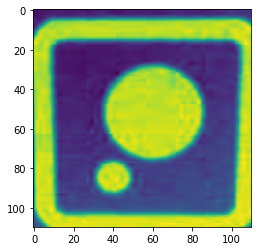

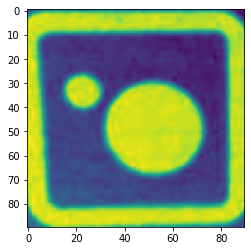

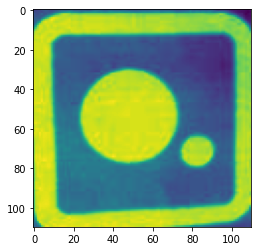

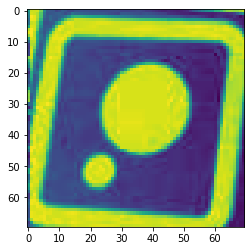

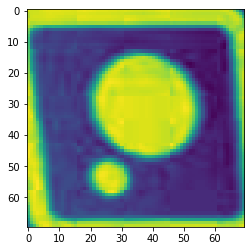

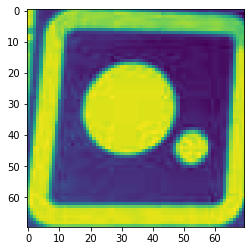

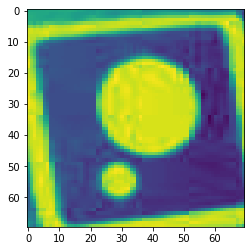

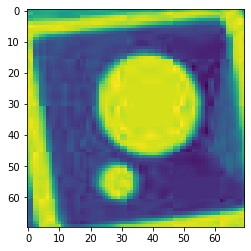

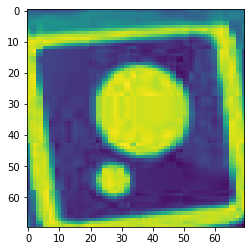

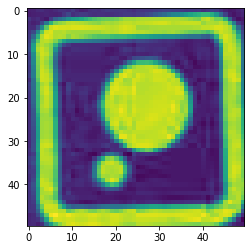

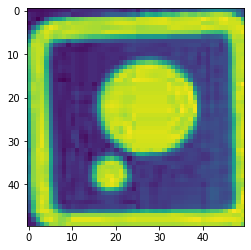

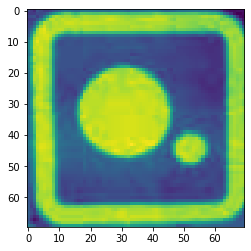

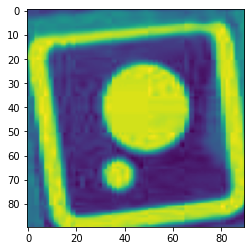

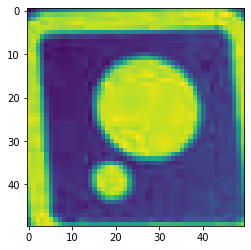

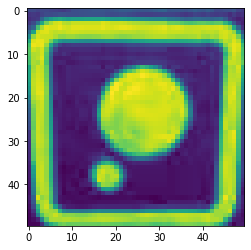

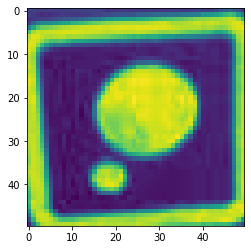

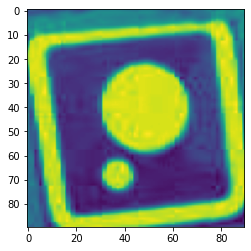

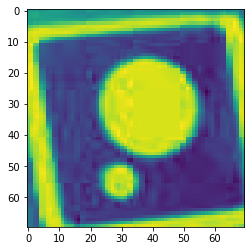

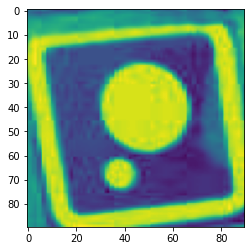

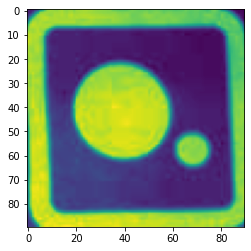

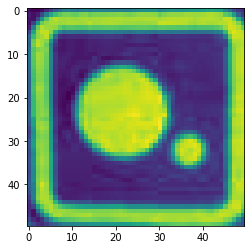

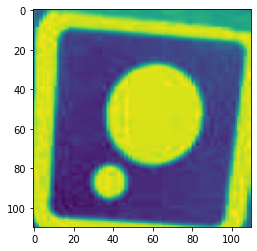

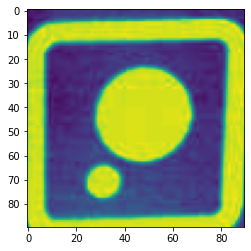

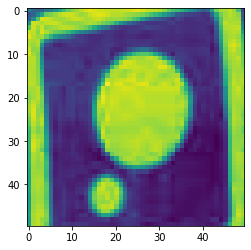

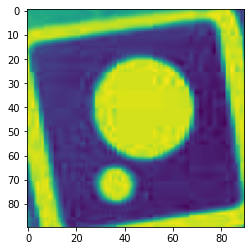

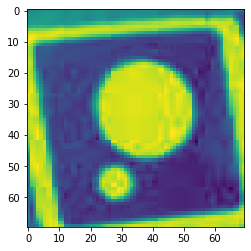

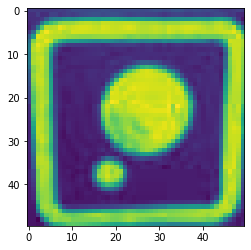

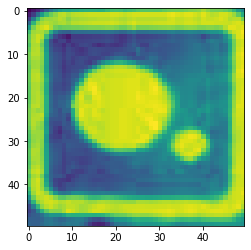

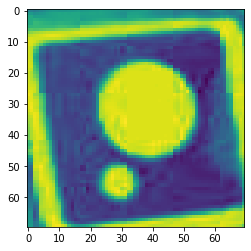

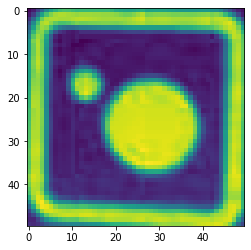

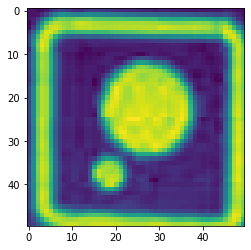

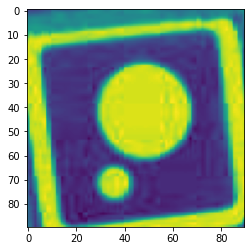

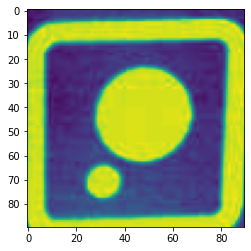

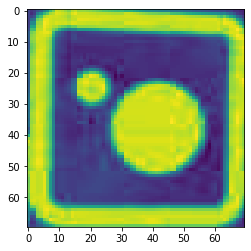

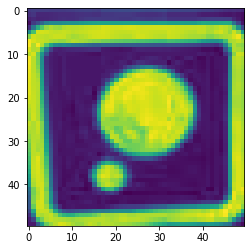

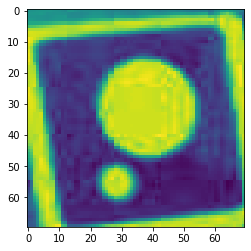

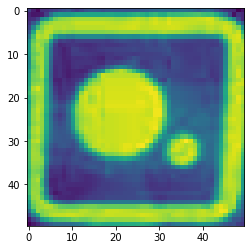

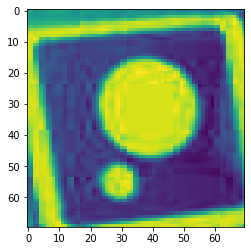

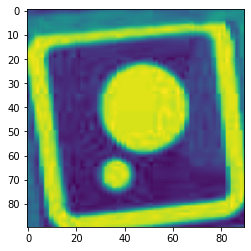

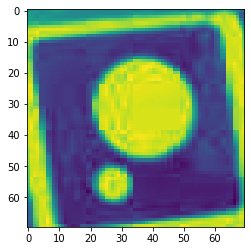

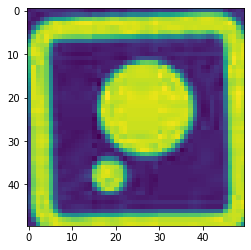

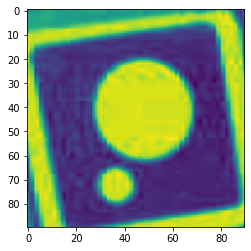

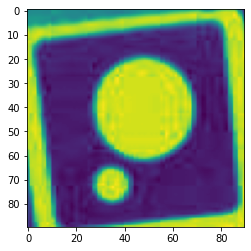

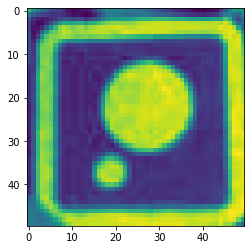

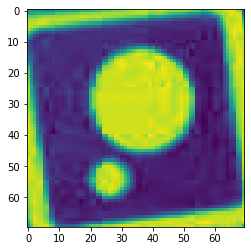

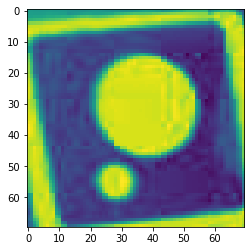

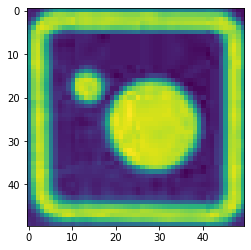

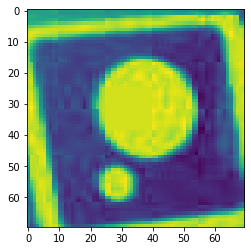

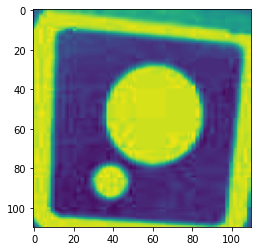

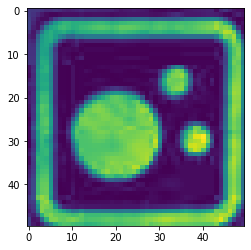

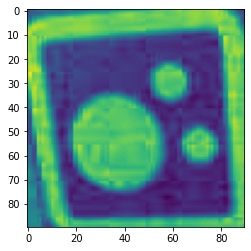

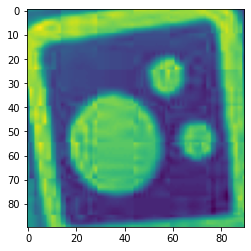

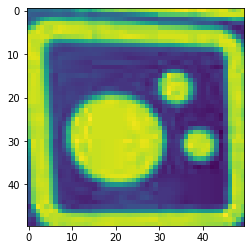

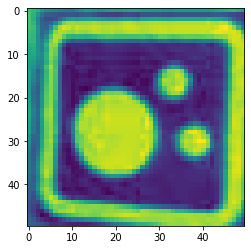

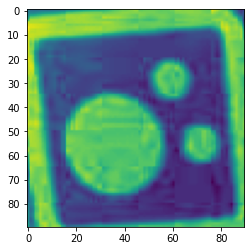

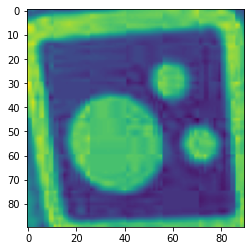

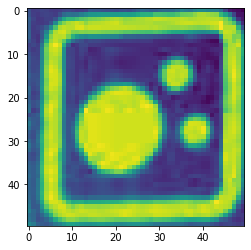

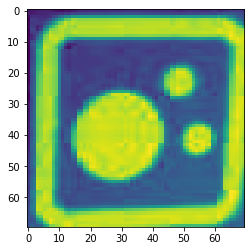

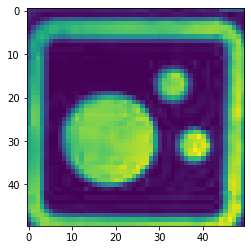

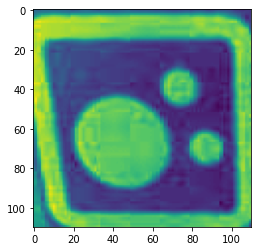

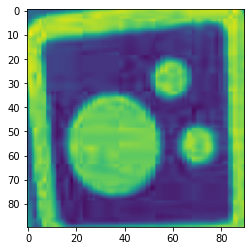

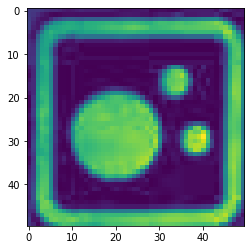

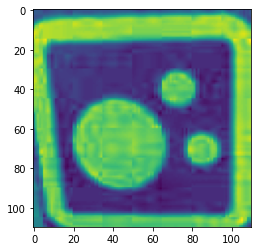

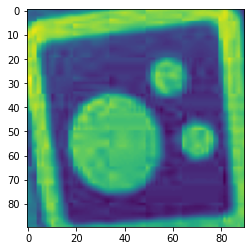

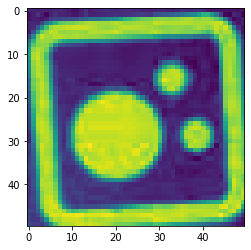

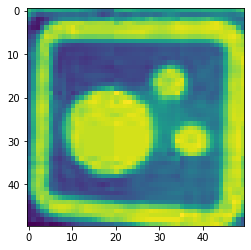

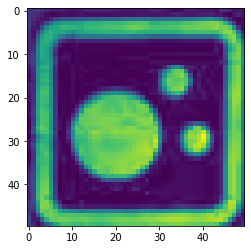

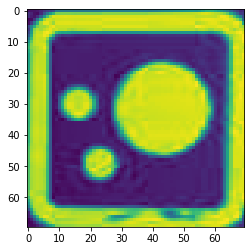

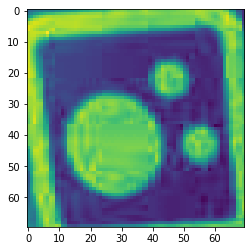

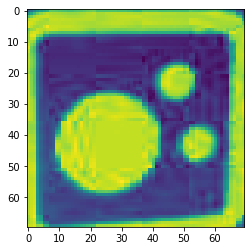

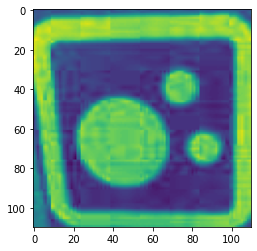

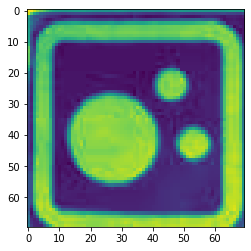

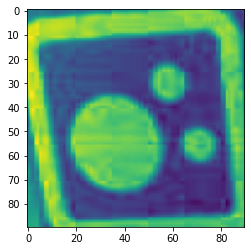

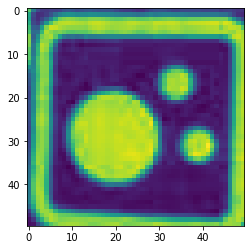

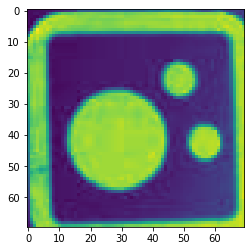

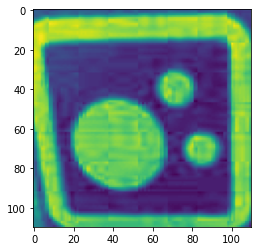

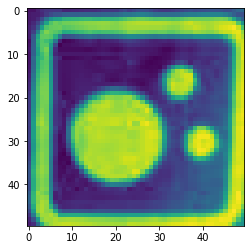

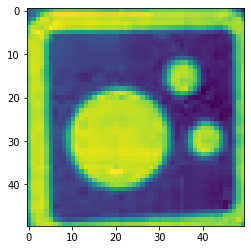

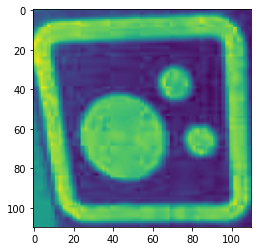

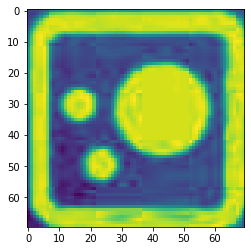

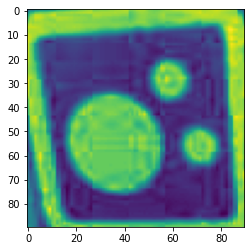

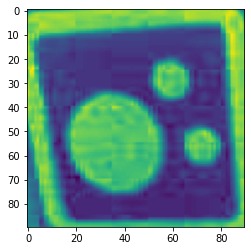

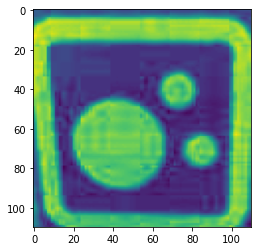

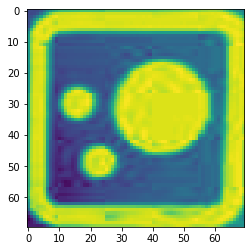

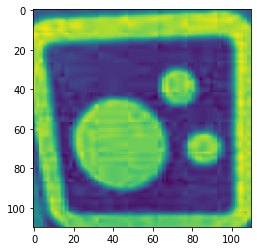

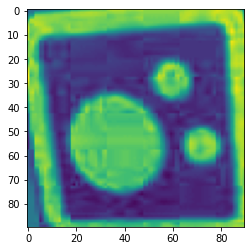

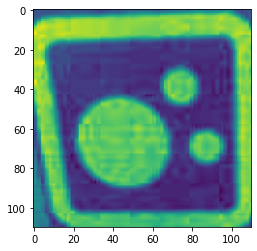

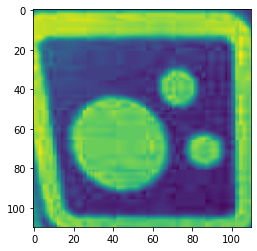

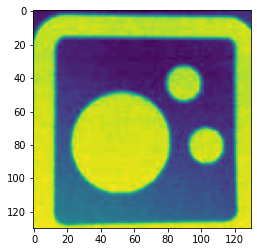

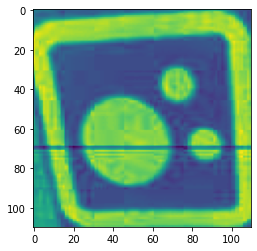

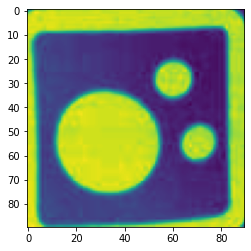

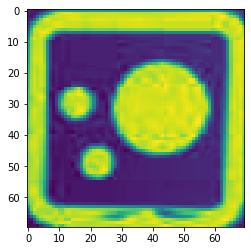

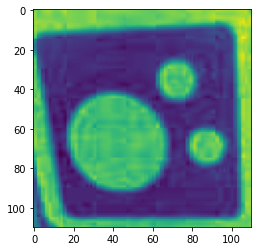

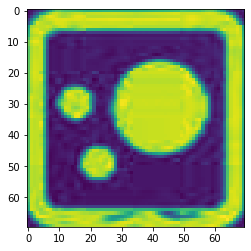

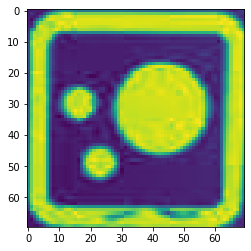

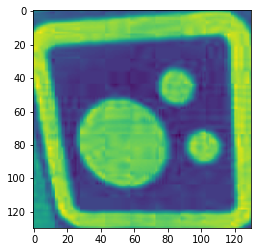

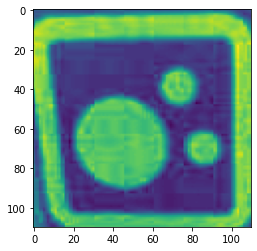

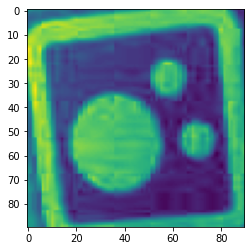

KeyboardInterrupt: 

In [17]:
# RUN THIS CELL TO CREATE ENSEMBLE_B DATABASE
#  TO REVISIT:
#  TWEEKING OF THRESHOLD FOR EACH SHAPE 

images_path = {}
for shape in ['Cercles', 'Diamants', 'Hexagones', 'Triangles']:
    imgs = walk_shapes(shape)
    images_path.update({shape: imgs})
    

dir = str(ROOT_DIR)+'\EnsembleB_H2020'
if os.path.exists(dir):
    shutil.rmtree(dir, ignore_errors=True)
time.sleep(1) # would make dir while getting deleted if no sleep
os.makedirs(dir)

# Path(ROOT_DIR,)

#     print(images_path.items())
for shape in ['Cercles', 'Diamants', 'Hexagones', 'Triangles']:
    templateNumber=2
    dirshape = str(dir)+'/'+str(shape)
    os.makedirs(dirshape)
    for key,value in images_path[shape].items():
        print(key)
        dirkey = str(dirshape)+'/'+str(key)
        os.makedirs(dirkey)
        if shape == 'Cercles':
            header = "C"
            template = cv2.imread('/home/julien/Projects/ETS/LOG635-LABO1-EQ5/resources/markers/'+str(header)+str(templateNumber)+'.jpg',cv2.IMREAD_GRAYSCALE)
        elif shape == 'Diamants':
            header = "C"
            template = cv2.imread('/home/julien/Projects/ETS/LOG635-LABO1-EQ5/resources/markers/'+str(header)+str(templateNumber)+'.jpg',cv2.IMREAD_GRAYSCALE)
        elif shape == 'Hexagones':
            header = "H"
            template = cv2.imread('/home/julien/Projects/ETS/LOG635-LABO1-EQ5/resources/markers/'+str(header)+str(templateNumber)+'.jpg',cv2.IMREAD_GRAYSCALE)
        elif shape == 'Triangles':
            header = "T"
            template = cv2.imread('/home/julien/Projects/ETS/LOG635-LABO1-EQ5/resources/markers/'+str(header)+str(templateNumber)+'.jpg',cv2.IMREAD_GRAYSCALE)
        templateNumber=templateNumber+1
        for imagePath in value:
#             print(imagePath)
            
            # load the image and resize it to a smaller factor so that
            # the shapes can be approximated better
            image = cv2.imread(imagePath)
            newImagePath=imagePath.replace("EnsembleA","EnsembleB")
            bitwise = cv2.bitwise_not(image)
            resized = imutils.resize(bitwise, width=300)
            ratio = image.shape[0] / float(resized.shape[0])

            #  https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html
            # convert the resized image to grayscale, blur it slightly,
            # and threshold it
            gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
            blurred = cv2.GaussianBlur(gray, (5, 5), 0)
            thresh = cv2.threshold(blurred, 160, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)[1]

#             imgplot = plt.imshow(gray)
#             plt.show()

#             imgplot = plt.imshow(blurred)
#             plt.show()

#             imgplot = plt.imshow(thresh)
#             plt.show()

#             plt.imshow(thresh, cmap='gray')
        
# WILL NEED TO EXTRACT IMAGE BEFORE FINDING FEATURES
            img = gray
            w,h = img.shape[::-1]
            baseTemplateWidth = int(w/2)
            i=0
            boolMatched = False
            templateRotation=0
#             im_crop=0
            while(templateRotation < 350 ):

                rotatedTemplate = imutils.rotate(template, angle=templateRotation)
            #     imgplot = plt.imshow(rotatedTemplate)
            #     plt.show()
                templateRotation=templateRotation+10

                while(i<baseTemplateWidth-40):
                    if(boolMatched):
                        break
                    bitwise = cv2.bitwise_not(template)
                    resized = imutils.resize(bitwise, width=baseTemplateWidth-i)

                    w,h = resized.shape[::-1]
                #     imgplot = plt.imshow(resized)
                #     plt.show()

                    i=i+20
                    result = cv2.matchTemplate(img, resized, cv2.TM_CCOEFF_NORMED)
                #     print("result")
                #     imgplot = plt.imshow(result)
                #     plt.show()

                    loc = np.where(result >= 0.6)

                    for pt in zip(*loc[::-1]):
                        print("WOW")
                        boolMatched = True
                        im_crop = img[pt[1]:pt[1]+h, pt[0]:pt[0]+w]
                        imgplot = plt.imshow(im_crop)
                        print(newImagePath)
                        cv2.imwrite(newImagePath, im_crop)
                        plt.show()
                        break
    